#Financial Analysis Project

###Group Members: Ritika Mishra and Raymond Liu
##Project Link: https://ritikamishra11.github.io/financial_analysis_project_milestone1.html
##Collaboration Plan:
We plan to meet twice a week to stay on track with our weekly goals. We will meet in person or over Zoom and we are planning on using Visual Studio Code. Every Monday, we will discuss what we want to accomplish that week and divide the tasks accordingly. We will meet again on Thursday to review progress, address any roadblocks, and plan any additional work required for the weekend. If necessary, we will also meet on Sunday to resolve any remaining issues together.

##Project Description:
In this project, we will analyze Apple Inc.'s and Microsoft's stock prices using various statistical and analytical techniques, such as data exploration, correlation analysis, and MACD (Moving Average Convergence Divergence) calculations. We will also apply linear regression models to examine the relationship between stock prices and time. Additionally, we will use Monte Carlo simulations to predict possible future price behavior. Our primary objective is to explore the volatility of stock prices and gain insights into potential future price distributions using daily stock data.

### Research Questions:
 * What is the historical volatility of Apple and Microsoft stock prices?
 * How can linear regression models help understand the relationship between stock prices and time?
 * How can Monte Carlo simulations predict future price behavior for these stocks?

## Data Source:
The source data consists of fundamental stock information for Apple and Microsoft from 1988-09-01 to 2024-10-11. The data contains adjusted price, volume, open, low, and high prices, which are all basic components of a stock. We downloaded the data from a public website, "Investors FastTrack," which has open-sourced stock information

Data Link: https://ftcloud.fasttrack.net/web/xreport/stocks?token=41985F2A-D605-4AD9-B0B9-046390223BEC

## Extraction, Transform, and Load (ETL):
For our ETL process, we began by uploading daily stock price data for Apple Inc. and Microsoft Corporation. The data was loaded into pandas DataFrames and included fields such as Date, Adjusted Price, Volume, Open, High, and Low prices. We transformed the data by converting the Date column to a datetime format for easier date manipulation. Additionally, we ensured that data types for numerical columns were correctly set to float or integer as appropriate. To maintain tidy data principles, each variable was kept in its own column, each observation in its own row, and each type of observational unit formed its own table. To ensure comparability, both datasets were aligned to have the same date range. Finally, we verified data consistency and displayed key samples for an initial overview, laying the groundwork for further analysis.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload CSV files for both datasets
uploaded = files.upload()

# Ensure plots display inline in the notebook
%matplotlib inline

# Load the Apple and Microsoft data
apple_data = pd.read_csv('AAPL.csv')
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
msft_data = pd.read_csv('MSFT.csv')
msft_data['Date'] = pd.to_datetime(msft_data['Date'])

# Check the structure of the data to ensure the correct columns are present
print("Apple Data Columns:")
print(apple_data.columns)
print("\nApple Data Types:")
print(apple_data.dtypes)
print("\nFirst 5 rows of Apple Data:")
print(apple_data.head())

print("\nMicrosoft Data Columns:")
print(msft_data.columns)
print("\nMicrosoft Data Types:")
print(msft_data.dtypes)
print("\nFirst 5 rows of Microsoft Data:")
print(msft_data.head())

# Align both datasets to the same date range
start_date = max(apple_data['Date'].min(), msft_data['Date'].min())
end_date = min(apple_data['Date'].max(), msft_data['Date'].max())
apple_data = apple_data[(apple_data['Date'] >= start_date) & (apple_data['Date'] <= end_date)]
msft_data = msft_data[(msft_data['Date'] >= start_date) & (msft_data['Date'] <= end_date)]

# Check data consistency
if len(apple_data) != len(msft_data):
    print("\nWarning: The datasets have different lengths after date alignment.")
else:
    print("\nThe datasets are aligned with the same number of records.")

# Display the adjusted date ranges
print("\nDate range for aligned datasets:")
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

# Display a quick overview of aligned data
print("\nAligned Apple Data Sample:")
print(apple_data.head())
print("\nAligned Microsoft Data Sample:")
print(msft_data.head())

Saving AAPL.csv to AAPL (1).csv
Saving MSFT.csv to MSFT (1).csv
Apple Data Columns:
Index(['Date', 'Adjusted Price', 'Open', 'Low', 'High', 'Volume'], dtype='object')

Apple Data Types:
Date              datetime64[ns]
Adjusted Price           float64
Open                     float64
Low                      float64
High                     float64
Volume                   float64
dtype: object

First 5 rows of Apple Data:
        Date  Adjusted Price   Open    Low   High    Volume
0 1988-09-01           0.270  0.270  0.267  0.277  246736.0
1 1988-09-02           0.277  0.277  0.270  0.279  186300.8
2 1988-09-06           0.270  0.270  0.269  0.279  143449.6
3 1988-09-07           0.266  0.266  0.262  0.276  179110.4
4 1988-09-08           0.270  0.270  0.262  0.276  207256.0

Microsoft Data Columns:
Index(['Date', 'Adjusted Price', 'Open', 'Low', 'High', 'Volume'], dtype='object')

Microsoft Data Types:
Date              datetime64[ns]
Adjusted Price           float64
Open            

##Exploratory Data Analysis (EDA):
For our EDA portion, we firstly made calculations on basic financial statistics, such as mean, median, and so on. They were useful for further exploration and also made the first step of our EDA research. With fundamental measures, we were able to generate some graphs to visualize stock information. We plotted history stock price charts and Moving Average Convergence/Divergence (MACD) to further understand the stock movements. Additionally, we tried to reveal the correlation between Apple and Microsoft's stock prices by calculating the Pearson correlation coefficient because Apple and Microsoft are typical technology companies, which might have certain correlations in our assumptions. In the future, we aimed to develop regression models to explore a relationship between stock prices and time and use Monte Carlo Method to simulate possible volatility of stock.

## Summary Statistics Explained
- **Mean Price**: The average adjusted price
- **Median Price**: The median adjusted price, providing a robust measure of central tendency.
- **Price Standard Deviation**: A measure of price volatility over the period.
- **Minimum and Maximum Price**: The lowest and highest prices in the dataset, giving the range of price movement.
- **Annualized Return**: The average return of the stock over a year.
- **Annualized Volatility**: The volatility of the stock price over a year, important for assessing risk.
- **Skewness**: The asymmetry of daily returns, showing whether returns are more likely to be extreme gains or losses.
- **Kurtosis**: The tailedness of the return distribution, highlighting the likelihood of outliers.
- **Max Drawdown**: The largest peak-to-trough decline, showing the worst-case downside risk.

In [9]:
# Function to calculate and display summary statistics
def summary_statistics(data, stock_name='Stock'):
    if 'Adjusted Price' not in data.columns:
        raise KeyError(f"'Adjusted Price' column is missing in the {stock_name} data.")

    # Ensure daily return column exists
    if 'Daily Return' not in data.columns:
        data['Daily Return'] = data['Adjusted Price'].pct_change()

    # Drop NaN values from 'Daily Return'
    data_cleaned = data.dropna(subset=['Daily Return'])

    # Calculate summary statistics
    summary_stats = {
        f"{stock_name} Mean Price": data['Adjusted Price'].mean(),
        f"{stock_name} Median Price": data['Adjusted Price'].median(),
        f"{stock_name} Price Standard Deviation": data['Adjusted Price'].std(),
        f"{stock_name} Minimum Price": data['Adjusted Price'].min(),
        f"{stock_name} Maximum Price": data['Adjusted Price'].max(),
        f"{stock_name} Annualized Return": data_cleaned['Daily Return'].mean() * 252,  # 252 trading days
        f"{stock_name} Annualized Volatility": data_cleaned['Daily Return'].std() * np.sqrt(252),
        f"{stock_name} Skewness": data_cleaned['Daily Return'].skew(),
        f"{stock_name} Kurtosis": data_cleaned['Daily Return'].kurtosis(),
        f"{stock_name} Max Drawdown": max_drawdown(data['Adjusted Price'])
    }

    return summary_stats

# Function to calculate the maximum drawdown (peak-to-trough decline)
def max_drawdown(prices):
    running_max = prices.cummax()  # Calculate the running maximum price
    drawdown = (prices - running_max) / running_max  # Calculate the percentage drawdown
    return drawdown.min()  # Return the largest drawdown

# Calculate and print summary statistics for Apple data
apple_stats = summary_statistics(apple_data, stock_name='Apple')
print("Apple Summary Statistics:")
for stat, value in apple_stats.items():
    print(f"{stat}: {value}")

# Calculate and print summary statistics for Microsoft data
msft_stats = summary_statistics(msft_data, stock_name='Microsoft')
print("\nMicrosoft Summary Statistics:")
for stat, value in msft_stats.items():
    print(f"{stat}: {value}")

Apple Summary Statistics:
Apple Mean Price: 27.23105583644757
Apple Median Price: 2.262
Apple Price Standard Deviation: 51.104290844199525
Apple Minimum Price: 0.098
Apple Maximum Price: 234.55
Apple Annualized Return: 0.2778283503745821
Apple Annualized Volatility: 0.42291299754761136
Apple Skewness: -0.3984390466453507
Apple Kurtosis: 23.9108741077217
Apple Max Drawdown: -0.8178472861085557

Microsoft Summary Statistics:
Microsoft Mean Price: 58.503084084414155
Microsoft Median Price: 20.232
Microsoft Price Standard Deviation: 95.6903149802217
Microsoft Minimum Price: 0.199
Microsoft Maximum Price: 466.729
Microsoft Annualized Return: 0.26039357591804385
Microsoft Annualized Volatility: 0.3168941099980314
Microsoft Skewness: 0.17220409040583787
Microsoft Kurtosis: 6.2719834436926885
Microsoft Max Drawdown: -0.6944362117742152


##Data Interpretation:
These statistics provide valuable insights into Apple and Microsoft's stock behaviors by offering different perspectives on its performance. The mean and median prices help in understanding the typical price levels, giving investors a sense of where the stock usually trades. Volatility measures, such as the standard deviation and annualized volatility, are crucial for assessing the risk associated with holding the stock, as they indicate the extent of price fluctuations. Skewness and kurtosis offer deeper insights into the distribution of returns, highlighting the likelihood of extreme gains or losses. Finally, the max drawdown is particularly important for risk management, as it shows the worst-case scenario for an investor by quantifying the largest historical peak-to-trough decline in the stock's value. Together, these statistics form a comprehensive picture of the stock’s risk and return characteristics.

Visualizing Apple Adjusted Price over the years:


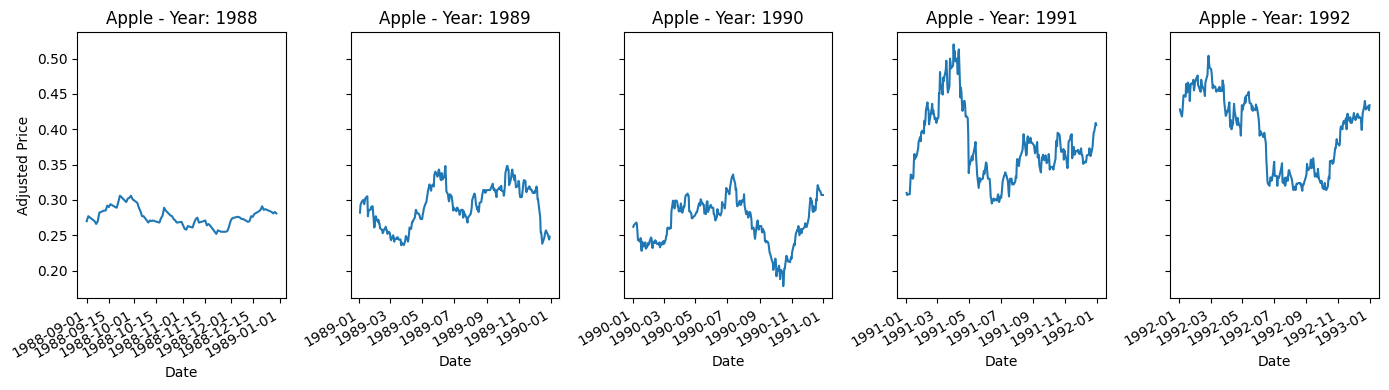


Visualizing Microsoft Adjusted Price over the years:


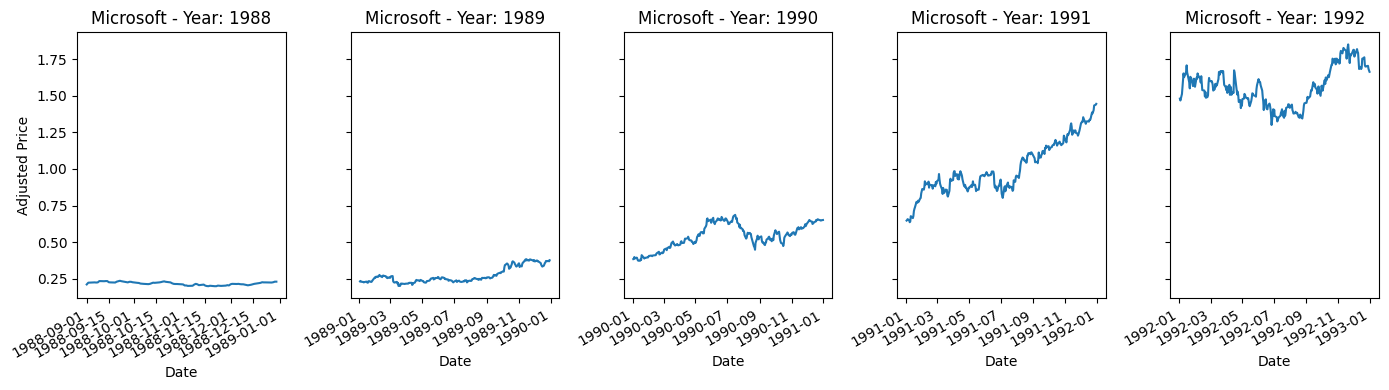

In [10]:
# Function to visualize adjusted price over years
def plot_adjusted_price_by_year(data, stock_name='Stock'):
    # Convert 'Date' column to datetime if not already
    data['Date'] = pd.to_datetime(data['Date'])

    # Extract unique years from 'Date' column
    years = data['Date'].dt.year.unique()

    # Create a 1x5 grid for visualizing the adjusted price over 5 different years
    fig, axes = plt.subplots(1, len(years[:5]), figsize=(14, 4), sharey=True)  # Limiting to first 5 years

    # Loop over each unique year and plot the Adjusted Price for that year
    for ax, year in zip(axes, years[:5]):  # Limiting to first 5 years for better visualization
        yearly_data = data[data['Date'].dt.year == year]

        # Plot Adjusted Price over time for that year
        yearly_data.plot(x='Date', y='Adjusted Price', ax=ax, legend=False)

        # Set title and labels
        ax.set_title(f"{stock_name} - Year: {year}")
        ax.set_xlabel('Date')
        ax.set_ylabel('Adjusted Price')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plotting for Apple data
print("Visualizing Apple Adjusted Price over the years:")
plot_adjusted_price_by_year(apple_data, stock_name='Apple')

# Plotting for Microsoft data
print("\nVisualizing Microsoft Adjusted Price over the years:")
plot_adjusted_price_by_year(msft_data, stock_name='Microsoft')

##Graph Interpretation:
This graphic represents the yearly adjusted stock prices for Apple Inc. over a period of five years, from 1988 to 1992. The adjusted price accounts for any corporate actions like stock splits or dividends, providing a more accurate reflection of Apple's stock performance over time.

## Trading Indicator: Moving Average Convergence/Divergence (MACD)
Moving Average Convergence/Divergence (MACD) is a financial indicator to help investors identify entry points for buying or selling.In this part, we take data for a year, which should be equivalent to 252 trading dates, to calculate our MACD. Specifcally, we apply a python function of ewm to calculate the 12-day and 26-day exponential moving averages (EMA). The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA. Then, we added them to dataframes and plotted them with matplotlib.

Apple MACD (Last 252 Trading Days):


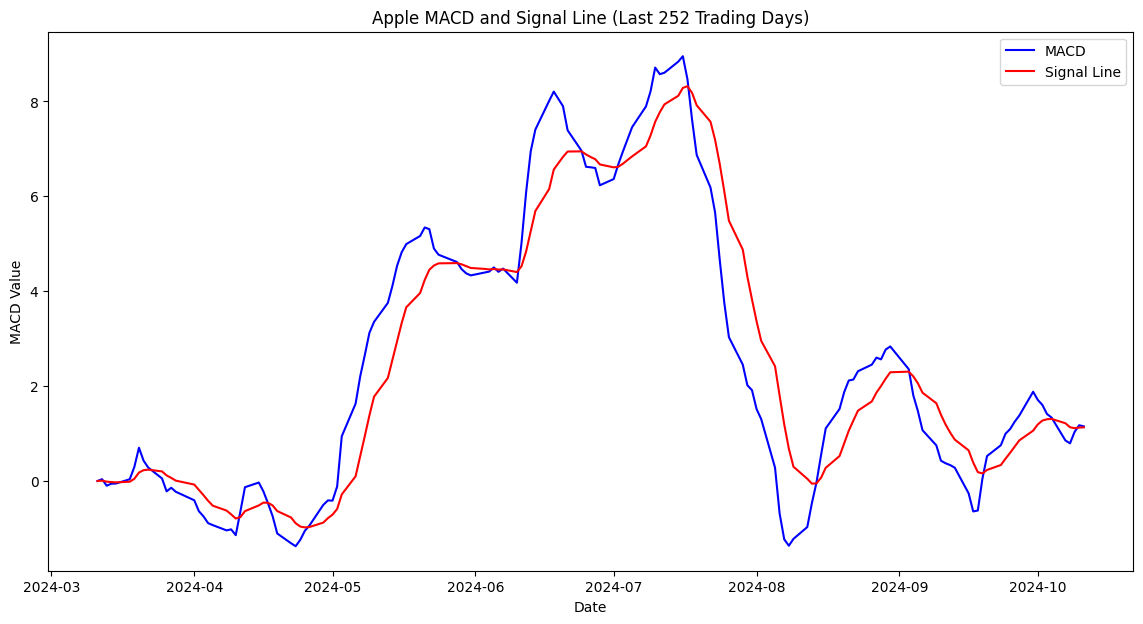


Microsoft MACD (Last 252 Trading Days):


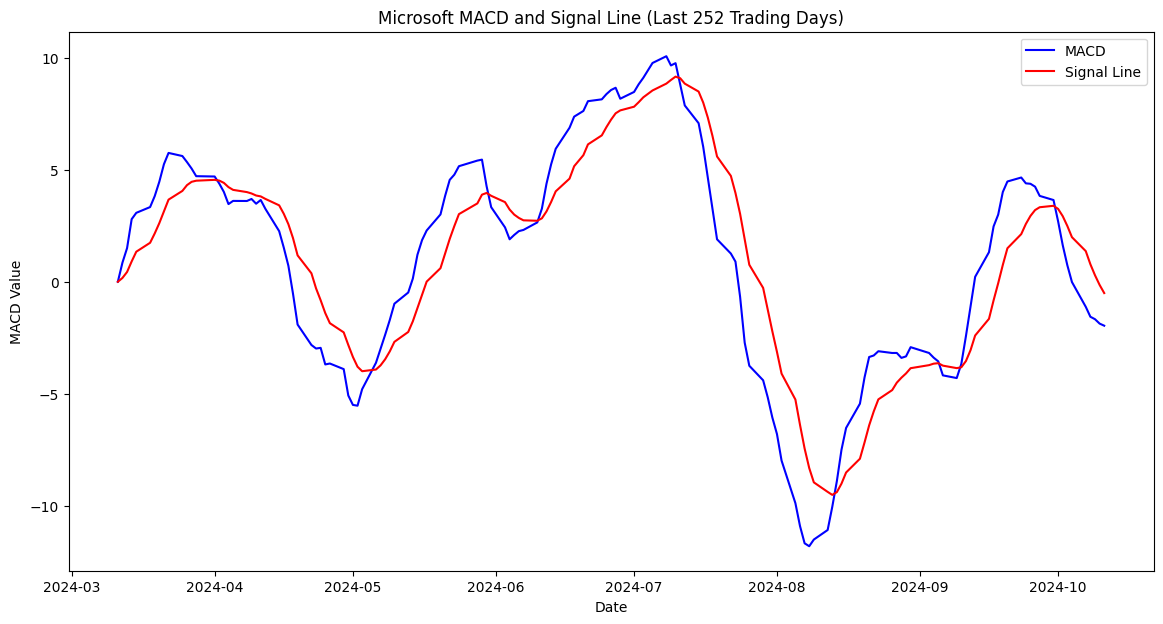

In [11]:
from datetime import datetime, timedelta

# Function to calculate MACD
def calculate_macd(data, stock_name='Stock'):
    # Ensure the data is sorted by date
    data = data.sort_values(by='Date')

    # Filter data for the last 252 trading days (approximately 1 year)
    one_year_ago = datetime.now() - timedelta(days=252)
    data = data[data['Date'] >= one_year_ago]

    # Calculate short-term and long-term EMA
    short_ema = data['Adjusted Price'].ewm(span=12, adjust=False).mean()
    long_ema = data['Adjusted Price'].ewm(span=26, adjust=False).mean()

    # Calculate MACD and Signal Line
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, adjust=False).mean()

    # Add to DataFrame
    data['MACD'] = macd
    data['Signal Line'] = signal_line

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
    plt.plot(data['Date'], data['Signal Line'], label='Signal Line', color='red')
    plt.title(f"{stock_name} MACD and Signal Line (Last 252 Trading Days)")
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.show()

    return data

# Calculate and plot MACD for Apple data
print("Apple MACD (Last 252 Trading Days):")
apple_data = calculate_macd(apple_data, stock_name='Apple')

# Calculate and plot MACD for Microsoft data
print("\nMicrosoft MACD (Last 252 Trading Days):")
msft_data = calculate_macd(msft_data, stock_name='Microsoft')

## Pearson correlation coefficient (Correlation between Apple and Microsoft）
In statistics, the Pearson correlation coefficient (PCC) is used to calculate a linear correlation between two sets of data. In our project, we applied it in calculating a correlation between Apple and Microsoft's stock prices, which were both considered representative technology companies. We firstly calculated daily returns from adjusted prices and  combined both sets of returns into one dataframe. With python function of "corr()" and matplotlib, we were able to calculate them and plotted them with a scatter plot to visualize the relationship between the daily returns of Apple and Microsoft.

Correlation between Apple and Microsoft Daily Returns: 0.4691


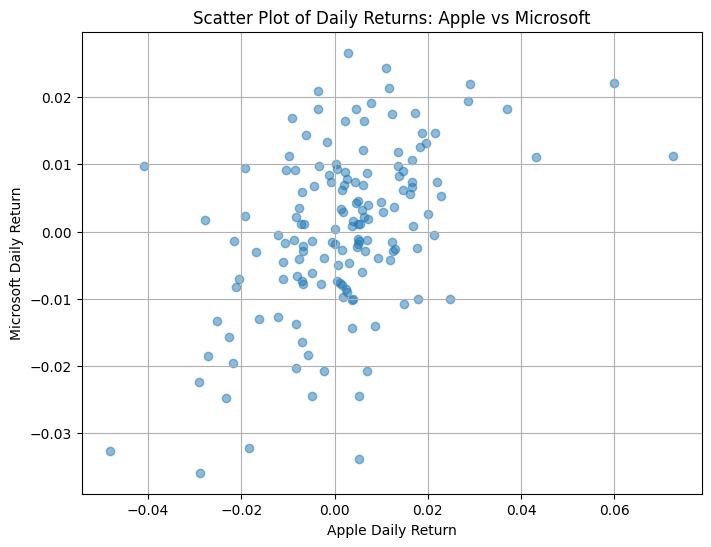

In [12]:
# Ensure daily returns are calculated
if 'Daily Return' not in apple_data.columns:
    apple_data['Daily Return'] = apple_data['Adjusted Price'].pct_change()

if 'Daily Return' not in msft_data.columns:
    msft_data['Daily Return'] = msft_data['Adjusted Price'].pct_change()

# Combine daily returns data
combined_returns = pd.DataFrame({
    'Apple': apple_data['Daily Return'],
    'Microsoft': msft_data['Daily Return']
}).dropna()  # Remove missing values

# Calculate correlation
correlation = combined_returns.corr().loc['Apple', 'Microsoft']
print(f"Correlation between Apple and Microsoft Daily Returns: {correlation:.4f}")

# Plot correlation
plt.figure(figsize=(8, 6))
plt.scatter(combined_returns['Apple'], combined_returns['Microsoft'], alpha=0.5)
plt.title('Scatter Plot of Daily Returns: Apple vs Microsoft')
plt.xlabel('Apple Daily Return')
plt.ylabel('Microsoft Daily Return')
plt.grid(True)
plt.show()

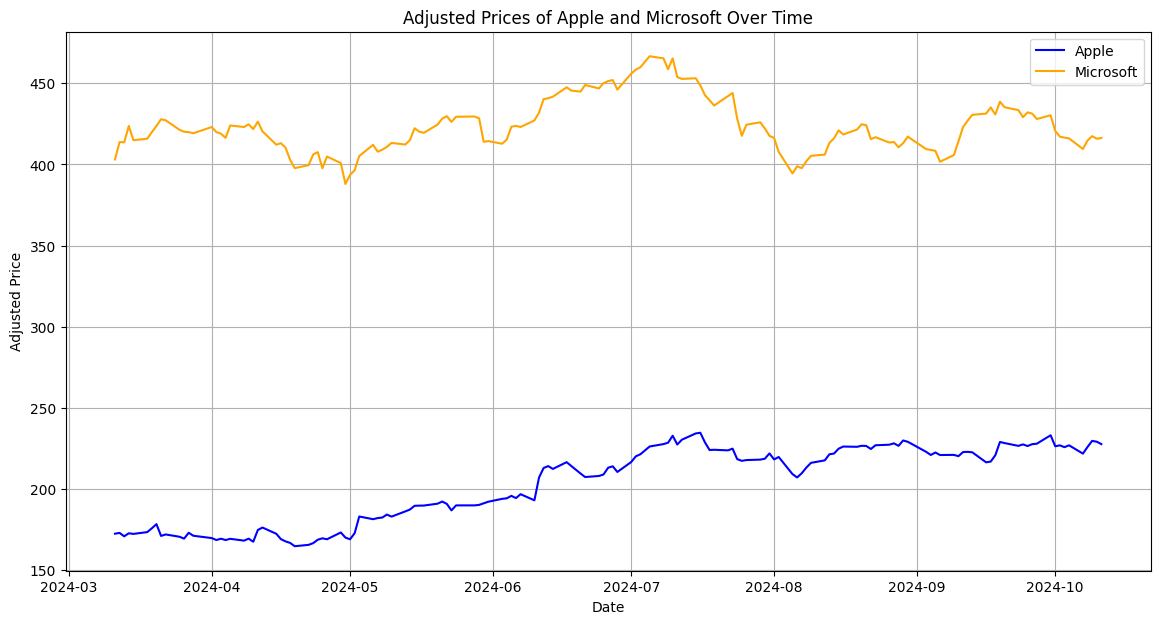

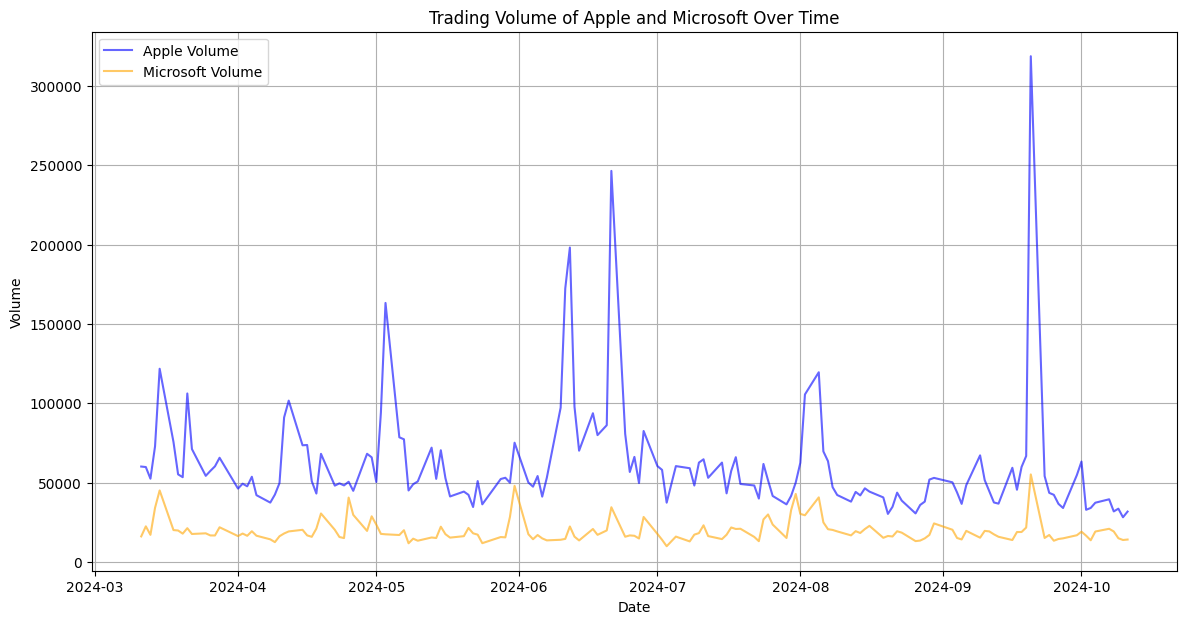

In [13]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'], format='%m/%d/%Y')
msft_data['Date'] = pd.to_datetime(msft_data['Date'], format='%m/%d/%Y')

# Time Series Plot of Adjusted Prices for Apple and Microsoft
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Date'], apple_data['Adjusted Price'], label='Apple', color='blue')
plt.plot(msft_data['Date'], msft_data['Adjusted Price'], label='Microsoft', color='orange')
plt.title('Adjusted Prices of Apple and Microsoft Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend()
plt.grid(True)
plt.show()

# Volume Analysis - Plotting Trading Volumes over time for Apple and Microsoft
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Date'], apple_data['Volume'], label='Apple Volume', color='blue', alpha=0.6)
plt.plot(msft_data['Date'], msft_data['Volume'], label='Microsoft Volume', color='orange', alpha=0.6)
plt.title('Trading Volume of Apple and Microsoft Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

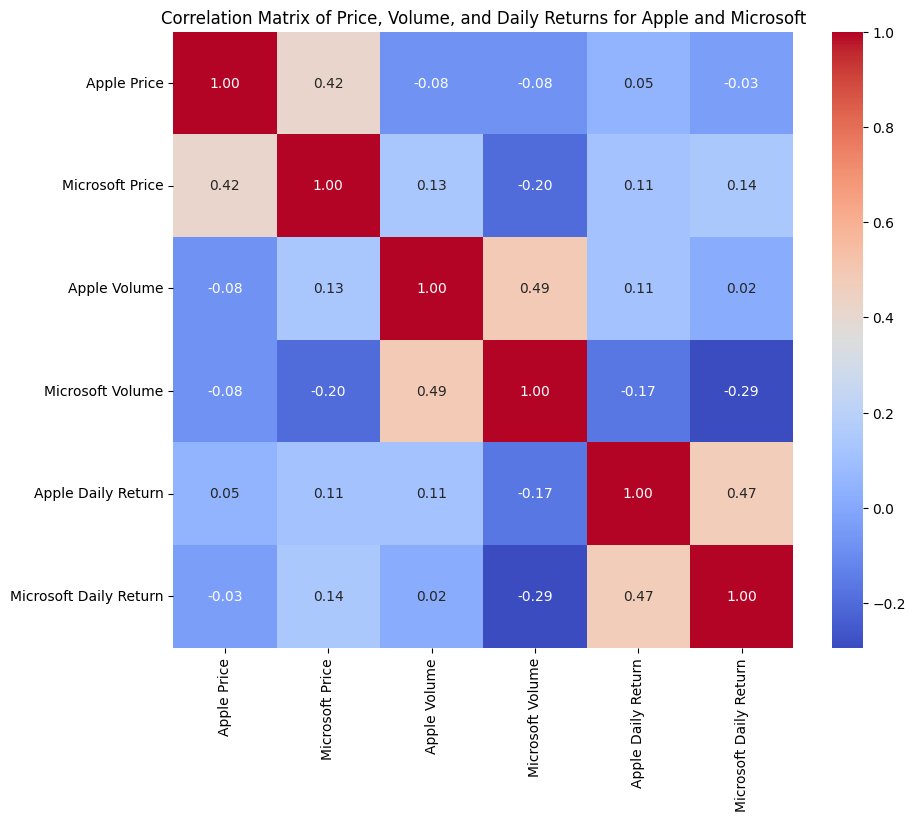

In [14]:
#Need to makesure seaborn is installed, use the following command: !pip install seaborn
import seaborn as sns

combined_data = pd.merge(apple_data[['Date', 'Adjusted Price', 'Volume']].rename(
                            columns={'Adjusted Price': 'Apple Price', 'Volume': 'Apple Volume'}),
                         msft_data[['Date', 'Adjusted Price', 'Volume']].rename(
                            columns={'Adjusted Price': 'Microsoft Price', 'Volume': 'Microsoft Volume'}),
                         on='Date')


combined_data['Apple Daily Return'] = combined_data['Apple Price'].pct_change()
combined_data['Microsoft Daily Return'] = combined_data['Microsoft Price'].pct_change()


combined_data = combined_data.dropna()


correlation_matrix = combined_data[['Apple Price', 'Microsoft Price',
                                    'Apple Volume', 'Microsoft Volume',
                                    'Apple Daily Return', 'Microsoft Daily Return']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Price, Volume, and Daily Returns for Apple and Microsoft')
plt.show()


Question 1: Can we predict the daily returns of Apple or Microsoft stocks using recent historical volatility and trading volume as predictors?

This question explores whether Apple or Microsoft’s daily returns can be predicted using recent historical volatility and trading volume as predictors. Rather than focusing solely on past prices, this approach integrates volatility (capturing return variability) and volume to gauge investor sentiment and market activity, which may influence price movements. By using both indicators, this model seeks insights into how market behavior impacts stock returns.

Variables Question 1:
    Dependent Variable: Daily returns of Apple or Microsoft.
    Reasoning: The goal is to predict the daily returns, making this the target or outcome variable.
    Independent Variables: Recent historical volatility (calculated as a rolling standard deviation of returns) and trading volume.
    Reasoning: Volatility reflects market uncertainty and investor sentiment, while trading volume indicates activity levels. These predictors are chosen because they may provide insights into factors that impact short-term price movements.

Model Question 2: Cross-Stock Momentum Prediction
Question: Is it possible to predict Microsoft’s daily returns based on Apple’s daily returns, or vice versa?

This question examines whether the daily returns of one stock, such as Apple, can predict the returns of another, like Microsoft. Moving beyond correlation, it investigates potential lead-lag relationships between these highly correlated tech stocks. Using cross-stock predictive modeling, including a Granger causality test, this model assesses if returns from one stock provide predictive insights into the other, adding depth to sector-specific analysis.

Variables Question 2:
    Dependent Variable: Daily returns of Microsoft (or Apple, depending on the prediction direction).
    Reasoning: The objective is to predict one stock's returns based on the other’s, making Microsoft (or Apple) the outcome variable.
    Independent Variable: Daily returns of Apple (or Microsoft).
    Reasoning: Apple and Microsoft are closely correlated stocks within the same sector, and movements in one may influence or predict movements in the other. This predictor tests if a lead-lag effect exists, potentially offering actionable insights for cross-stock momentum analysis.

Citations:
Waskom, Michael, et al. Seaborn: Statistical Data Visualization. https://seaborn.pydata.org. Accessed 13 Nov. 2024.